In [189]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import bootstrap

### Import Datas

In [97]:
data = pd.read_excel('/content/drive/MyDrive/InvestmentReplica.xlsx',sheet_name='Replica')
dates = data['Date'].values
data.drop('Date', axis=1, inplace=True)
futures = ['CO1', 'DU1','ES1', 'GC1','LLL1', 'NQ1', 'RX1','TP1','TU2','TY1','VG1']
print(data.columns)

Index(['MXWO', 'MXWD', 'LEGATRUU', 'HFRXGL', 'RX1', 'TY1', 'GC1', 'CO1', 'ES1',
       'VG1', 'NQ1', 'LLL1', 'TP1', 'DU1', 'TU2'],
      dtype='object')


### Funzioni utili

In [114]:
def logRet(prices):
  return np.log(prices[1:]/prices[:-1])

def ret(prices):
  return prices[:-1]/prices[1:]-1

def ret2price(ret):
  cumulative_log_returns = np.cumsum(ret, axis=0)
  prices = np.exp(cumulative_log_returns)
  one = np.ones(prices[0].shape)
  return np.vstack([one, prices])

# nella chiamata di ret2price deve esserci X[['blabla']].values  (doppia parentesi quadra)



### plots

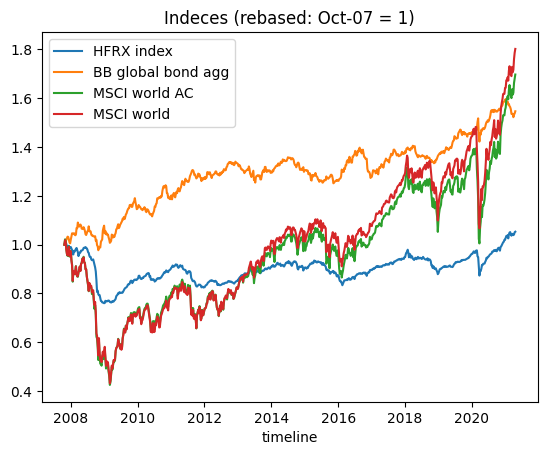

In [86]:
plt.plot(dates, data['HFRXGL']/data['HFRXGL'].iloc[0], label = 'HFRX index')
plt.plot(dates, data['LEGATRUU']/data['LEGATRUU'].iloc[0], label = 'BB global bond agg')
plt.plot(dates, data['MXWD']/data['MXWD'].iloc[0], label = 'MSCI world AC')
plt.plot(dates, data['MXWO']/data['MXWO'].iloc[0], label = 'MSCI world')
plt.legend()
plt.title('Indeces (rebased: Oct-07 = 1)')
plt.xlabel('timeline')
plt.show()

### Create a monster Index

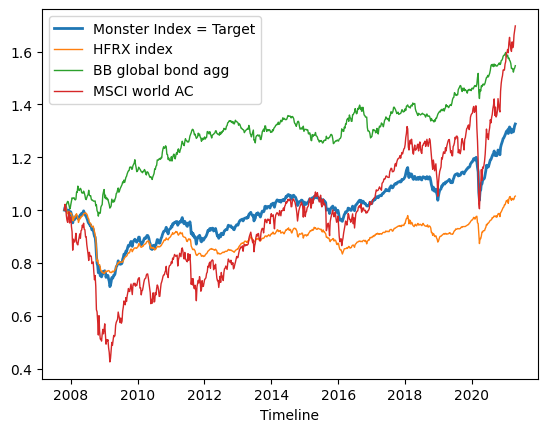

In [134]:
wHFRXGL = 0.5
wMXWO = 0.25
wLEGATRUU = 0.25
y = wHFRXGL*logRet(data['HFRXGL'].values) + wMXWO*logRet(data['MXWO'].values) + wLEGATRUU*logRet(data['LEGATRUU'].values)
y = pd.DataFrame(y, columns=['Monster Index'])
target = ret2price(y.values)

plt.plot(dates, target, label ='Monster Index = Target', linewidth = 2)
plt.plot(dates, data['HFRXGL']/data['HFRXGL'].iloc[0], label = 'HFRX index', linewidth = 1)
plt.plot(dates, data['LEGATRUU']/data['LEGATRUU'].iloc[0], label = 'BB global bond agg', linewidth = 1)
plt.plot(dates, data['MXWD']/data['MXWD'].iloc[0], label = 'MSCI world AC', linewidth = 1)
plt.legend()
plt.xlabel('Timeline')
plt.show()

Tutta la parte di studio di normalità e data exploration vedi matlab

### Future returns

          CO1       DU1       ES1       GC1      LLL1       NQ1       RX1  \
0    0.053921  0.000242  0.006859  0.037242  0.028268  0.002596  0.000791   
1    0.064438  0.000000 -0.007187  0.044198 -0.002950  0.007077  0.000000   
2   -0.048667  0.001787 -0.027759 -0.030081 -0.037828 -0.077593  0.004909   
3    0.072297  0.001977 -0.025435 -0.009557 -0.036700 -0.015236  0.003230   
4   -0.031597  0.001204 -0.013577  0.028157 -0.023954 -0.001475  0.003133   
..        ...       ...       ...       ...       ...       ...       ...   
699 -0.117801  0.000357 -0.015925 -0.003356  0.000000 -0.011106  0.000815   
700  0.053643 -0.000446  0.012208 -0.024172  0.000000 -0.009890 -0.005366   
701 -0.022069  0.000268  0.029035  0.033634  0.000000  0.052322  0.003969   
702  0.014714 -0.000045  0.016787  0.002695  0.000000  0.029462 -0.002449   
703  0.043639 -0.000134 -0.001404  0.016302  0.000000 -0.012456 -0.002280   

          TP1       TU2       TY1       VG1  
0    0.025151  0.000903  0.00

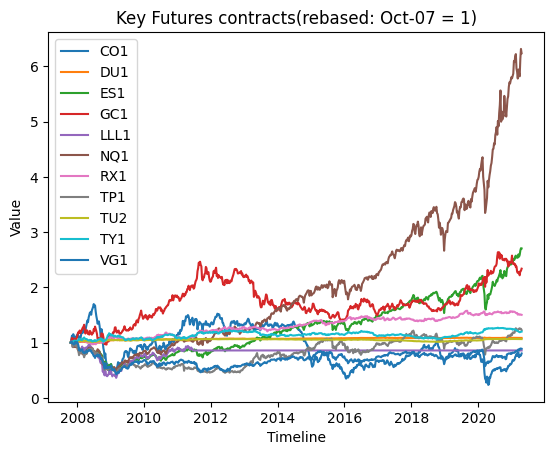

In [138]:
X = logRet(data[futures].values)
X = pd.DataFrame(X, columns=futures)
print(X)

plt.plot(dates, ret2price(X.values), label = futures)
plt.xlabel('Timeline')
plt.ylabel('Value')
plt.title('Key Futures contracts(rebased: Oct-07 = 1)')
plt.legend()
plt.show()

eventualmente studiare correlation e time dependency ( vedi matlab)

### Model Exploration

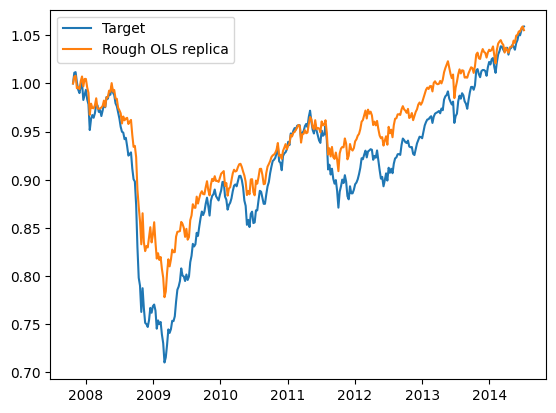

In [177]:
X_ME = X.iloc[:350]
y_ME = y.iloc[:350]
Date_ME = dates[:351]

model = sm.OLS(y_ME, X_ME)
results = model.fit().params

replRetOLS = np.dot(X_ME, results.values)
replRetOLS = pd.DataFrame(replRetOLS, columns=['retOLS'])
repOLS = ret2price(replRetOLS.values) #from returns to levels

plt.plot(Date_ME, ret2price(y_ME.values), label = 'Target')
plt.plot(Date_ME, repOLS, label = 'Rough OLS replica')
plt.legend()
plt.show()

### Gross Exposure?

Gross Exposure:  1.3060574594857817


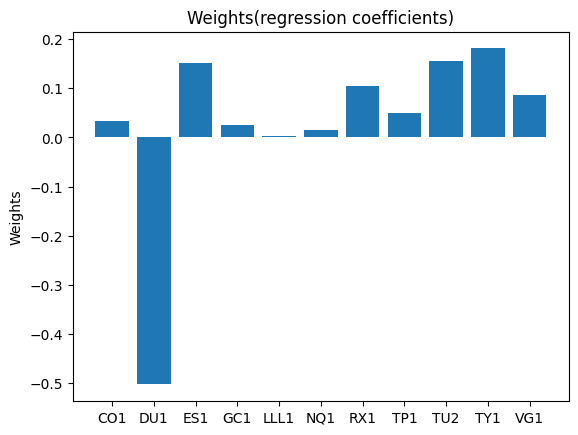

In [185]:
GrossExposure = np.sum(np.abs(results.values))
print('Gross Exposure: ', GrossExposure)

plt.bar(futures, results.values)
plt.title('Weights(regression coefficients)')
plt.ylabel('Weights')
plt.show()

### non so come porco dio farlo

In [192]:
nboot = 1e3

model = sm.OLS(y_ME, X_ME)
results = model.fit().params
boot = bootstrap(results.values, )

TypeError: bootstrap() got multiple values for argument 'statistic'